<a href="https://colab.research.google.com/github/TandasaNiriksha/cognifyz-internship/blob/main/LEVEL_3_(task_1%2C2%2C3)_COGNIFYZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL 3**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/Dataset.csv')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# Task1-Analyze the text reviews to identify the most common positive and negative keywords and calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [ ]:
stop_words = set(stopwords.words('english'))
all_words = [word for review in data['Rating text'] for word in review.split() if word.lower() not in stop_words]


In [ ]:
reviews = data['Rating text']
data['Review text'] = data['Rating text'].fillna('')

In [ ]:
# Analyzing text reviews to identify common positive and negative keywords from English language..
word_count = Counter(all_words)
most_common_words = word_count.most_common(10)
print('Top Most Common Words in Reviews:')
print(most_common_words)

Top Most Common Words in Reviews:
[('Average', 3737), ('Good', 3179), ('rated', 2148), ('Excellent', 301), ('Poor', 186)]


In [ ]:
# Calculating the average length of reviews..
data['Review Length'] = data['Review text'].apply(lambda x: len(nltk.word_tokenize(x)))
average_review_length = data['Review Length'].mean()
print(f"Average Review Length: {average_review_length:.2f} words")

Average Review Length: 1.34 words


In [ ]:
data['Review_Length'] = data['Review text'].apply(len)

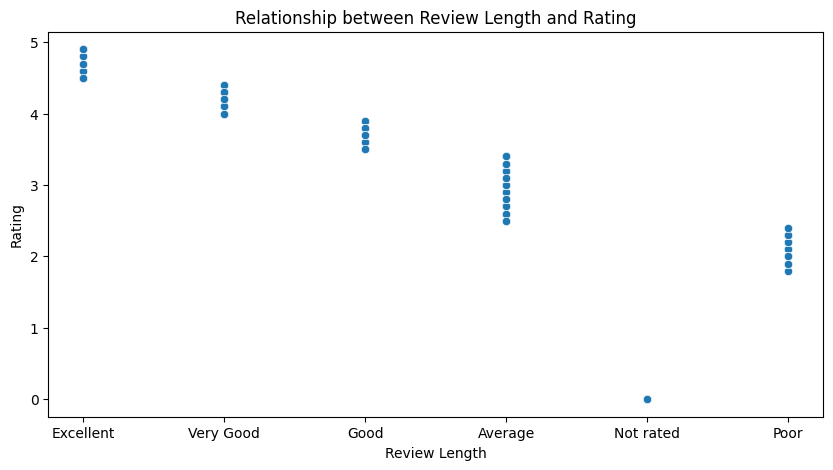

In [ ]:
# Plotting the relationship between review length and rating..
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='Rating text', y='Aggregate rating')
plt.xlabel('Review Length')
plt.ylabel('Rating')
plt.title('Relationship between Review Length and Rating')
plt.show()

In [ ]:
correlation_coefficient = data['Review_Length'].corr(data['Aggregate rating'])
print("Correlation Coefficient between Review Length and Raing:", correlation_coefficient)


Correlation Coefficient between Review Length and Raing: -0.4788848381349333


# Task-2 Identify the restaurants with highest and lowest number of votes, analyze if there is a correlation between the number of votes and the ratin of a restaurant.

In [ ]:
# Identifying restaurants with the highest number of votes..

highest_votes = data.nlargest(10, 'Votes')

print(highest_votes)


      Restaurant ID            Restaurant Name  Country Code       City  \
728           51705                       Toit             1  Bangalore   
735           51040                   Truffles             1  Bangalore   
3994         308322           Hauz Khas Social             1  New Delhi   
2412          20404                  Peter Cat             1    Kolkata   
739           56618  AB's - Absolute Barbecues             1  Bangalore   
2414          20842            Barbeque Nation             1    Kolkata   
743           58882                Big Brewsky             1  Bangalore   
2307          94286  AB's - Absolute Barbecues             1  Hyderabad   
736           54162            The Black Pearl             1  Bangalore   
2411          20870                      BarBQ             1    Kolkata   

                                                Address  \
728   298, Namma Metro Pillar 62, 100 Feet Road, Ind...   
735   28, 4th 'B' Cross, Koramangala 5th Block, Bang... 

Text(0.5, 1.0, 'Restaurants with Highest Votes')

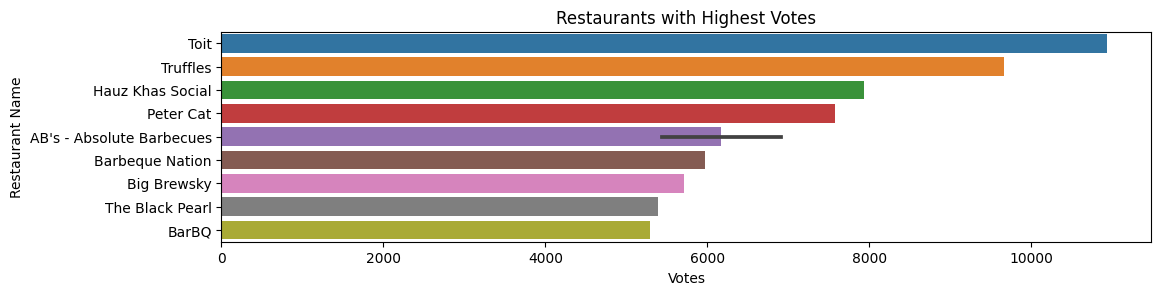

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.barplot(data=highest_votes, x='Votes', y='Restaurant Name')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.title('Restaurants with Highest Votes')

In [ ]:
# Identifying restaurants with the lowest number of votes..

lowest_votes = data.nsmallest(10, 'Votes')

print(lowest_votes)

     Restaurant ID     Restaurant Name  Country Code        City  \
69         6710645    Cantinho da Gula            30  S??o Paulo   
874       18433852       The Chaiwalas             1   Faridabad   
879       18465871  Fusion Food Corner             1   Faridabad   
880       18472646       Punjabi Rasoi             1   Faridabad   
887       18471268       Baskin Robbin             1   Faridabad   
900         308961              Angaar             1   Faridabad   
901         308963               TcozY             1   Faridabad   
902         308962       The Retriever             1   Faridabad   
905       18472429      Chill 'N Grill             1   Faridabad   
906       18472418  Punjabi Restaurant             1   Faridabad   

                                               Address  \
69   Rua Pedroso Alvarenga, 522, Itaim Bibi, S??o P...   
874  Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...   
879  158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...   
880  1, Deepak Comp

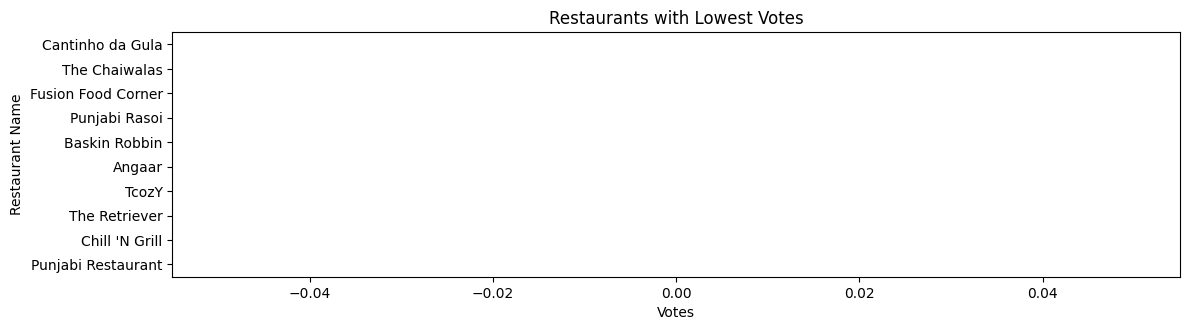

In [ ]:

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
sns.barplot(data=lowest_votes, x='Votes', y='Restaurant Name')
plt.xlabel('Votes')
plt.ylabel('Restaurant Name')
plt.title('Restaurants with Lowest Votes')
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing the correlation between the number of votes and restaurant rating..
correlation = data['Votes'].corr(data['Aggregate rating'])
print(f'Correlation between Votes and Rating: {correlation:.2f}')

Correlation between Votes and Rating: 0.31


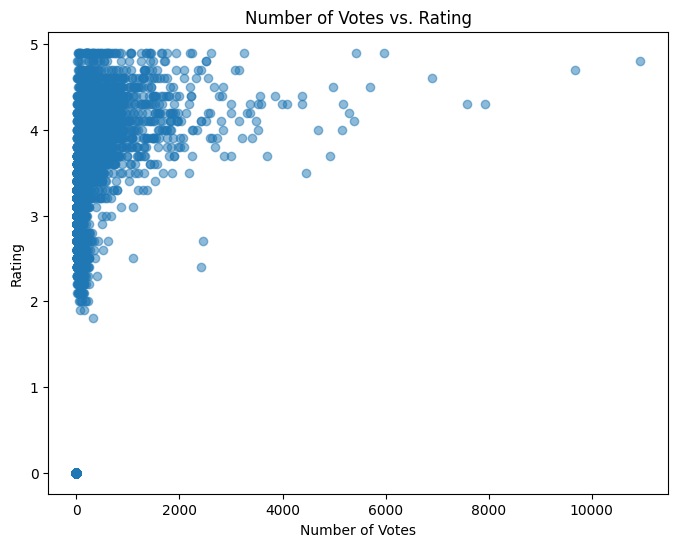

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Votes'], data['Aggregate rating'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Number of Votes vs. Rating')
plt.show()

# Task3- Analyze if there is relationship between the price range and the availability of online delivery and table booking, determine if higher-priced restaurants are more likely to offer this.

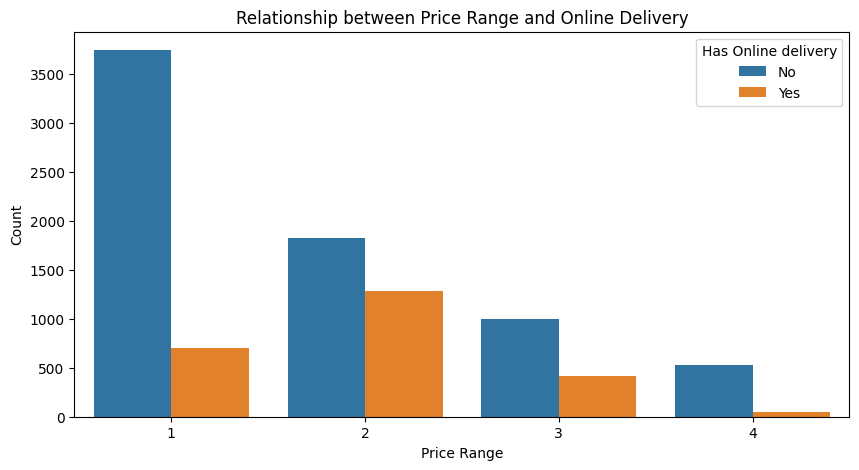

In [ ]:
# Plotting the relationship between price range and online delivery..
plt.figure(figsize=(10, 5))
sns.countplot(data=data , x='Price range', hue='Has Online delivery')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Relationship between Price Range and Online Delivery')
plt.show()

In [ ]:
# Determine if higher-priced restaurants are more likely to offer online delivery
price_online_crosstab = pd.crosstab(data['Price range'], data['Has Online delivery'], normalize='index')
print('Cross-tabulation between Price Range and Online Delivery:')
print(price_online_crosstab)


Cross-tabulation between Price Range and Online Delivery:
Has Online delivery        No       Yes
Price range                            
1                    0.842259  0.157741
2                    0.586894  0.413106
3                    0.708097  0.291903
4                    0.909556  0.090444


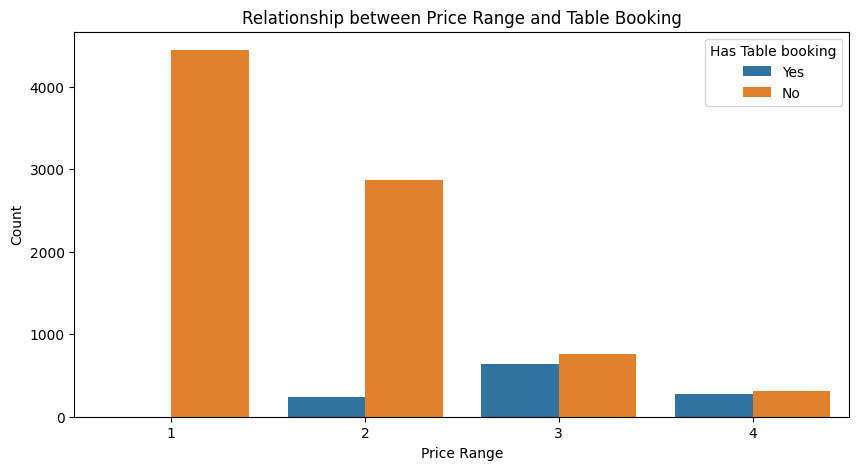

In [ ]:
# Plot the relationship between price range and table booking..
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='Price range', hue='Has Table booking')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Relationship between Price Range and Table Booking')
plt.show()


In [ ]:
# Determine if higher-priced restaurants are more likely to offer table booking
price_table_crosstab = pd.crosstab(data['Price range'], data['Has Table booking'], normalize='index')
print('\nCross-tabulation between Price Range and Table Booking:')
print(price_table_crosstab)


Cross-tabulation between Price Range and Table Booking:
Has Table booking        No       Yes
Price range                          
1                  0.999775  0.000225
2                  0.923225  0.076775
3                  0.542614  0.457386
4                  0.532423  0.467577
